In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import cooler
import cooltools
import bioframe as bf
import pathlib

In [2]:
pathlib.Path('results/Figure_1').mkdir(parents=True, exist_ok=True)

In [3]:
resolution = 1000000
df = bf.binnify(bf.read_chromsizes('../data/mm10/mm10.chrom.sizes'), resolution)
chromosomes = [f'chr{i}' for i in range(1, 20)]

In [4]:
bins = df.copy()
mm10_genome = bf.load_fasta('../data/mm10/mm10.fa')
gc_cov = bf.frac_gc(bins[['chrom', 'start', 'end']], mm10_genome)

In [5]:
control_cool = cooler.Cooler('results/2_normalized_and_balanced_contact_maps/Control_B2_1000000_balanced.cool')
brd2dep_cool = cooler.Cooler('results/2_normalized_and_balanced_contact_maps/Brd2_dep_rep2_1000000_balanced.cool')

In [6]:
compartments = df.copy()
control_eigs = cooltools.eigs_cis(control_cool, n_eigs=1, phasing_track=gc_cov)
E1 = control_eigs[1][['chrom', 'start', 'end', 'E1']].rename(columns={'E1': 'Control_B2_E1'})
compartments = compartments.merge(E1, on=['chrom', 'start', 'end'], how='left')

brd2dep_eigs = cooltools.eigs_cis(brd2dep_cool, n_eigs=1, phasing_track=gc_cov)
E1 = brd2dep_eigs[1][['chrom', 'start', 'end', 'E1']].rename(columns={'E1': 'Brd2_dep_rep2_E1'})
compartments = compartments.merge(E1, on=['chrom', 'start', 'end'], how='left')

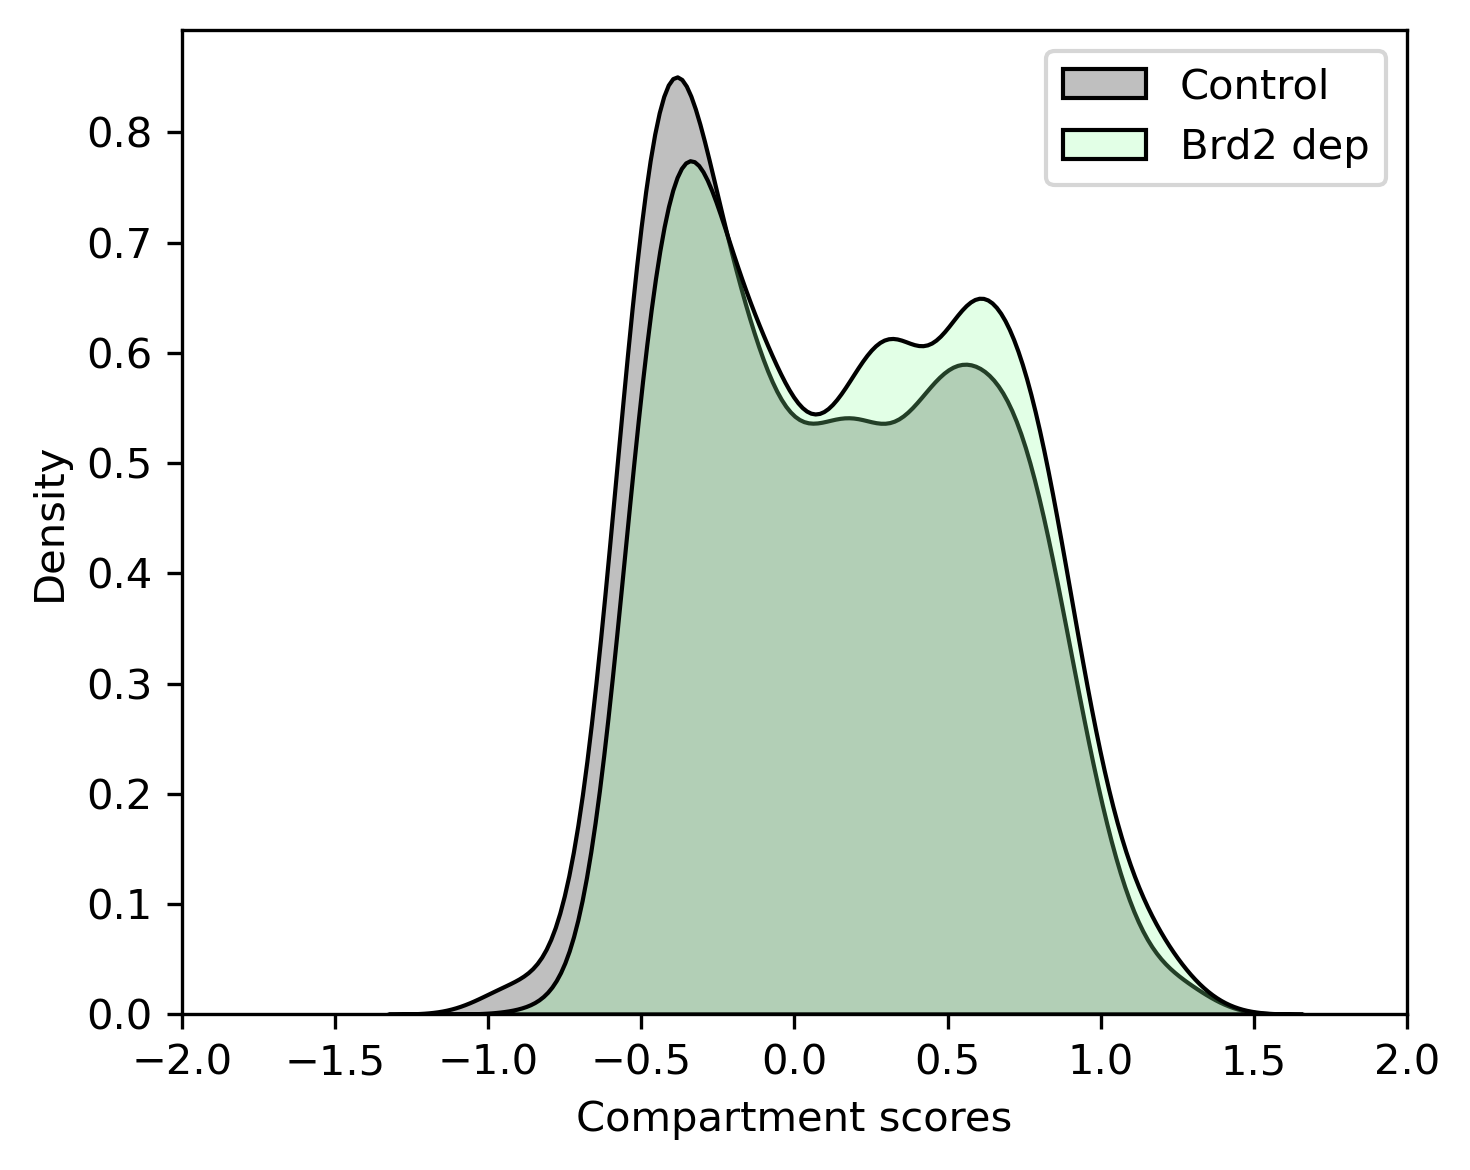

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi=300)
sns.kdeplot(data=compartments[compartments['chrom'].isin(chromosomes)], x='Control_B2_E1', alpha=0.25, label='Control', ax=ax, color='k', fill=True, linewidth=1)
sns.kdeplot(data=compartments[compartments['chrom'].isin(chromosomes)], x='Brd2_dep_rep2_E1', alpha=0.25, label='Brd2 dep', ax=ax, color='xkcd:mint green', fill=True, linewidth=1, edgecolor='k')
ax.set_xlim(-2, 2)
ax.set(xlabel='Compartment scores', ylabel='Density')
ax.legend(loc='upper right')
fig.tight_layout()
plt.savefig('results/Figure_1/A_kdeplot_compartment_scores.pdf', bbox_inches='tight', dpi=300)

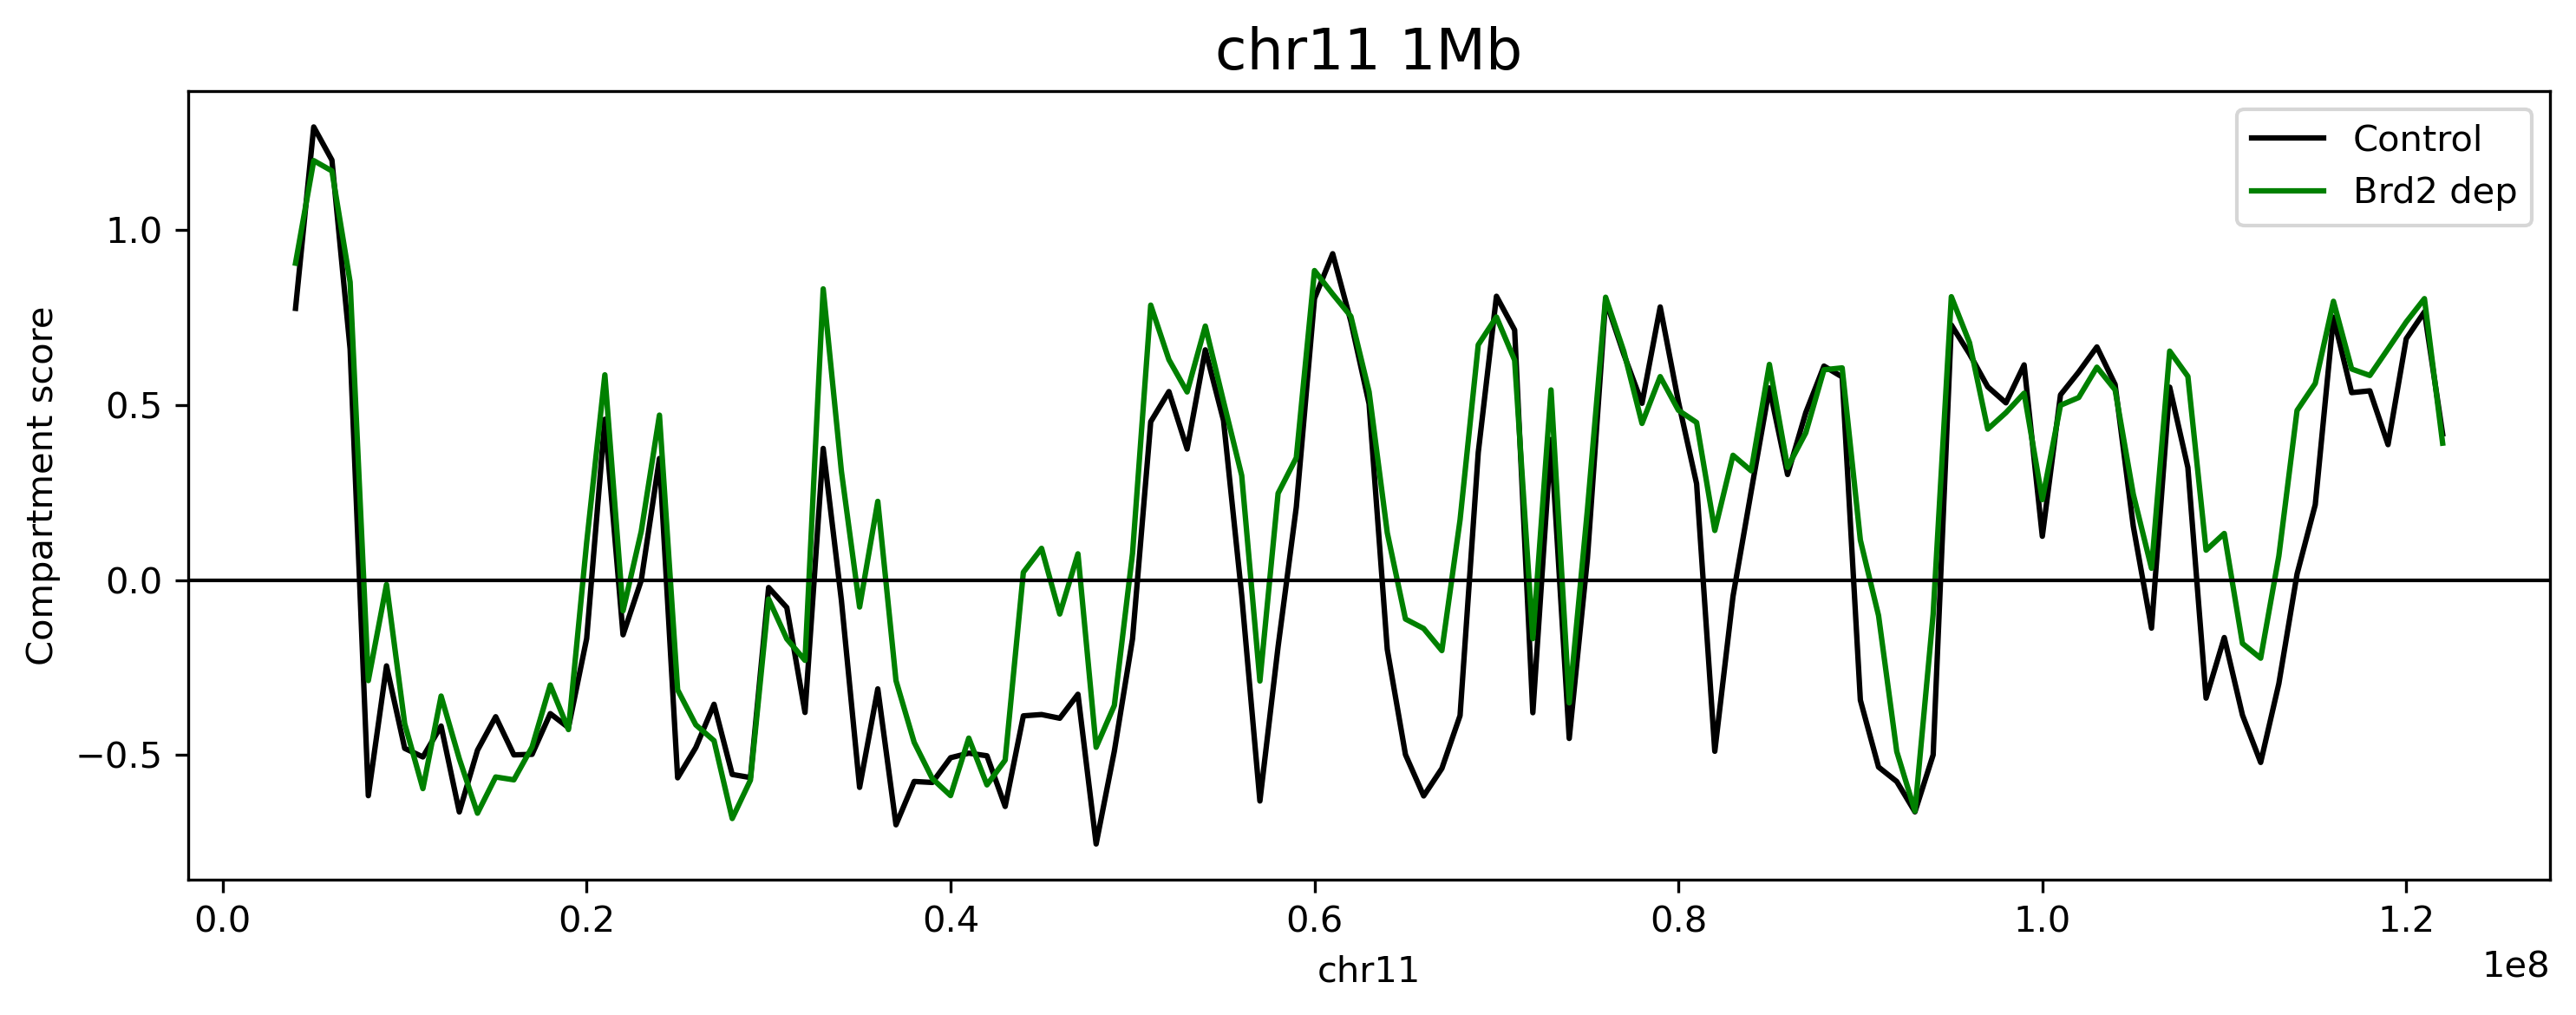

In [8]:
chrom = 'chr11'
fig, ax = plt.subplots(1, 1, figsize=(10, 4), dpi=300)
select_df = compartments[compartments['chrom']==chrom]
sns.lineplot(data=select_df, x='start', y='Control_B2_E1', label='Control', color='black', ax=ax)
sns.lineplot(data=select_df, x='start', y='Brd2_dep_rep2_E1', label='Brd2 dep', color='green', ax=ax)
ax.axhline(0, color='black', lw=1)

ax.set_xlabel(chrom)
ax.set_ylabel('Compartment score')
ax.set_title(f'{chrom} 1Mb', fontsize=16)
fig.tight_layout()
plt.savefig(f'results/Figure_1/B_compartment_profile_{chrom}.pdf', bbox_inches='tight', dpi=300)

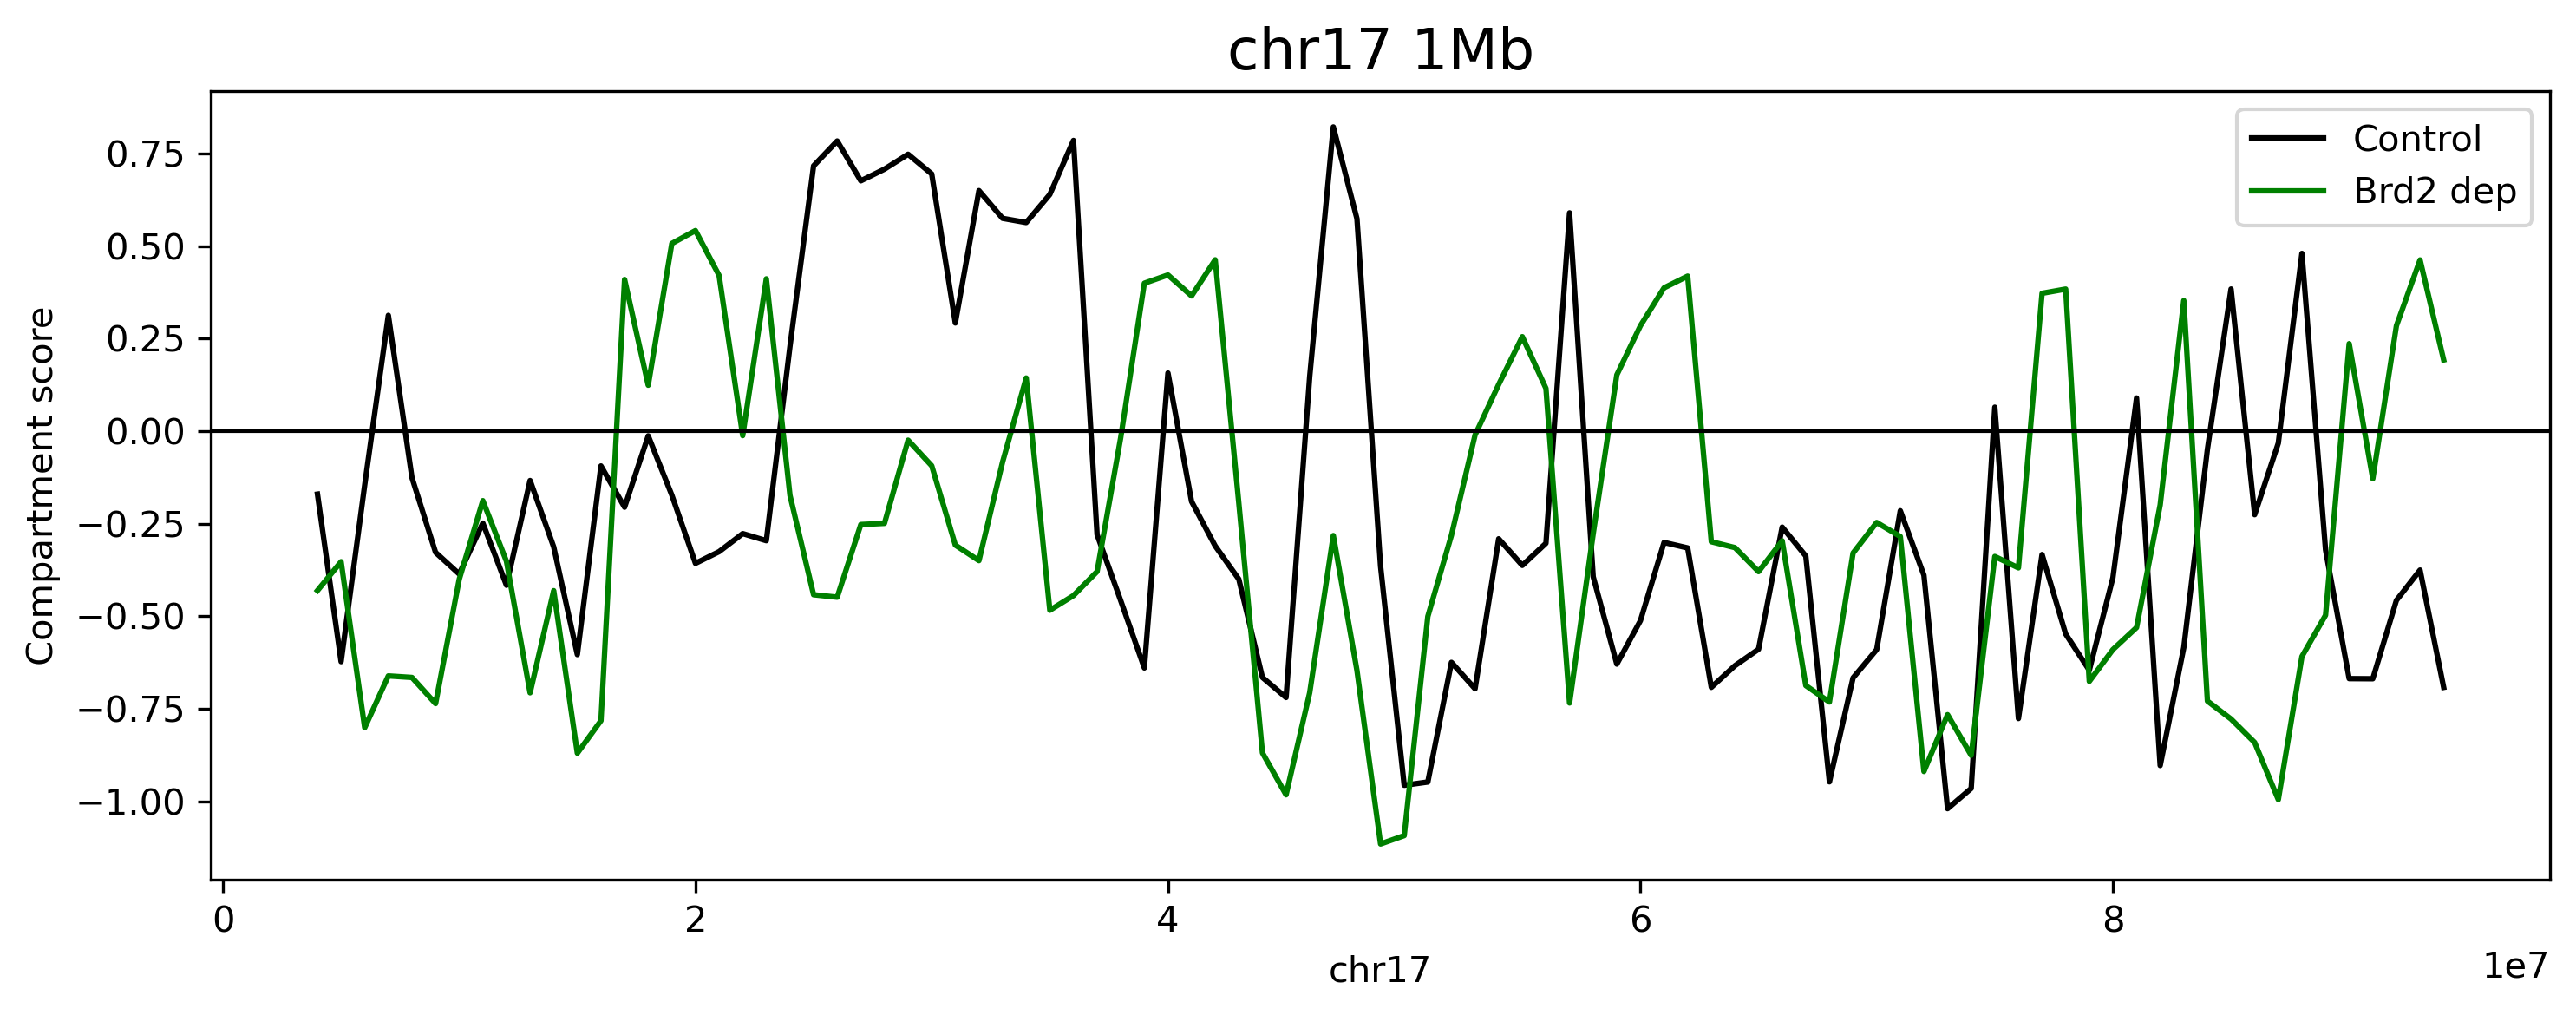

In [9]:
chrom = 'chr17'
fig, ax = plt.subplots(1, 1, figsize=(10, 4), dpi=300)
select_df = compartments[compartments['chrom']==chrom]
select_df['Brd2_dep_rep2_E1'] *= -1  # the original published figure was flipped, likely due to poor phasing with the GC track and the use of histone marks for phasing
sns.lineplot(data=select_df, x='start', y='Control_B2_E1', label='Control', color='black', ax=ax)
sns.lineplot(data=select_df, x='start', y='Brd2_dep_rep2_E1', label='Brd2 dep', color='green', ax=ax)
ax.axhline(0, color='black', lw=1)

ax.set_xlabel(chrom)
ax.set_ylabel('Compartment score')
ax.set_title(f'{chrom} 1Mb', fontsize=16)
fig.tight_layout()
plt.savefig(f'results/Figure_1/B_compartment_profile_{chrom}.pdf', bbox_inches='tight', dpi=300)